In [1]:
import numpy as np
import pandas as pd

In [77]:
df=pd.read_csv("./GSRAY.IS.csv")
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-01,0.903702,0.903702,0.903702,0.903702,0.903702,0
2014-01-02,0.895315,0.901605,0.889024,0.897412,0.897412,1824961
2014-01-03,0.897412,0.901605,0.891121,0.897412,0.897412,1487296
2014-01-06,0.926766,0.935153,0.918379,0.933056,0.933056,4964666
2014-01-07,0.960314,0.979185,0.956121,0.972895,0.972895,3834492
...,...,...,...,...,...,...
2024-03-12,6.930000,7.590000,6.890000,7.320000,7.320000,92884481
2024-03-13,7.400000,7.810000,7.300000,7.640000,7.640000,76053135
2024-03-14,7.590000,7.660000,7.310000,7.380000,7.380000,39807552


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2621 entries, 2014-01-01 to 2024-03-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2621 non-null   float64
 1   High       2621 non-null   float64
 2   Low        2621 non-null   float64
 3   Close      2621 non-null   float64
 4   Adj Close  2621 non-null   float64
 5   Volume     2621 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 143.3 KB


In [5]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2621.000000,2621.000000,2621.000000,2621.000000,2621.000000,2.621000e+03
mean,1.900933,1.942560,1.860742,1.897740,1.897740,4.431025e+07
std,1.763770,1.805840,1.719845,1.758895,1.758895,7.597967e+07
min,0.630655,0.641528,0.625218,0.636091,0.636091,0.000000e+00
25%,0.897412,0.909992,0.886928,0.897412,0.897412,5.844358e+06
50%,1.216119,1.239563,1.187603,1.209409,1.209409,1.989826e+07
75%,2.027882,2.071375,1.989825,2.022445,2.022445,5.362741e+07
max,9.400000,9.580000,9.050000,9.410000,9.410000,1.349148e+09


In [7]:
cor=df.corr()
cor

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999405,0.999472,0.998842,0.998842,0.161034
High,0.999405,1.000000,0.999186,0.999460,0.999460,0.173259
Low,0.999472,0.999186,1.000000,0.999445,0.999445,0.155703
Close,0.998842,0.999460,0.999445,1.000000,1.000000,0.166314
Adj Close,0.998842,0.999460,0.999445,1.000000,1.000000,0.166314
Volume,0.161034,0.173259,0.155703,0.166314,0.166314,1.000000


# Predicting current day's Adj Close

## Training/Test Data


In [8]:
y = df['Adj Close']
x_cols=[c for c in df.columns if c not in ['Adj Close']]
x = df[x_cols]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Time Series Models

### Moving Average

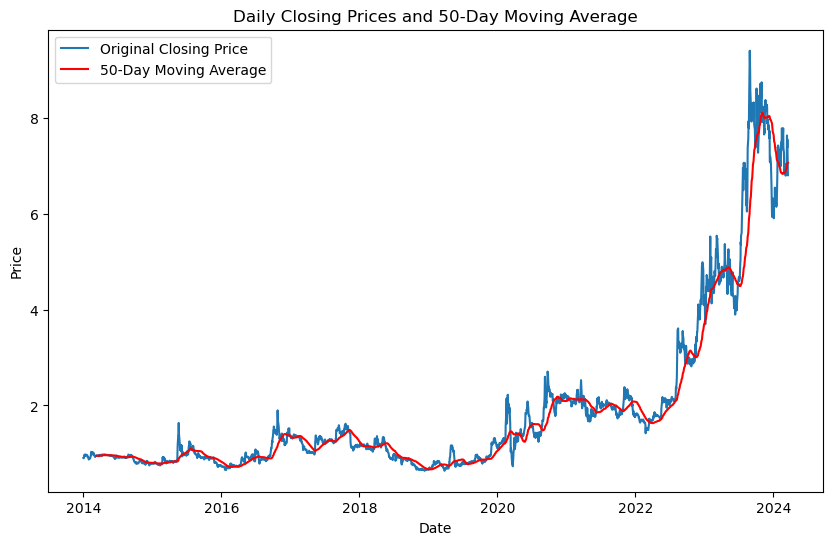

In [11]:
import matplotlib.pyplot as plt
import matplotlib

# Calculate the 50-day moving average on the closing prices
window_size = 50
moving_average = df['Adj Close'].rolling(window=window_size).mean()

# Plot the original closing prices and the 50-day moving average values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Adj Close'], label='Original Closing Price')
plt.plot(moving_average.index, moving_average, label='50-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Closing Prices and 50-Day Moving Average')
plt.legend()
plt.show()

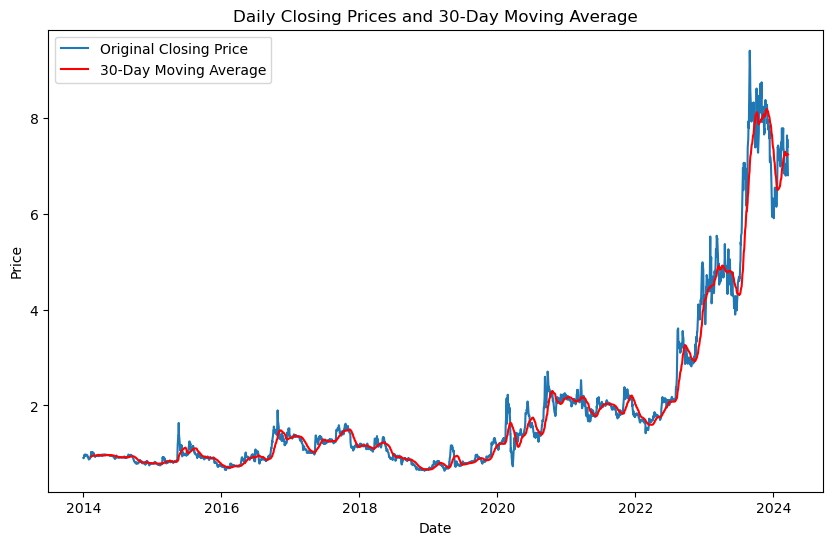

In [12]:
# Calculate the 50-day moving average on the closing prices
window_size = 30
moving_average = df['Adj Close'].rolling(window=window_size).mean()

# Plot the original closing prices and the 50-day moving average values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Adj Close'], label='Original Closing Price')
plt.plot(moving_average.index, moving_average, label='30-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Closing Prices and 30-Day Moving Average')
plt.legend()
plt.show()

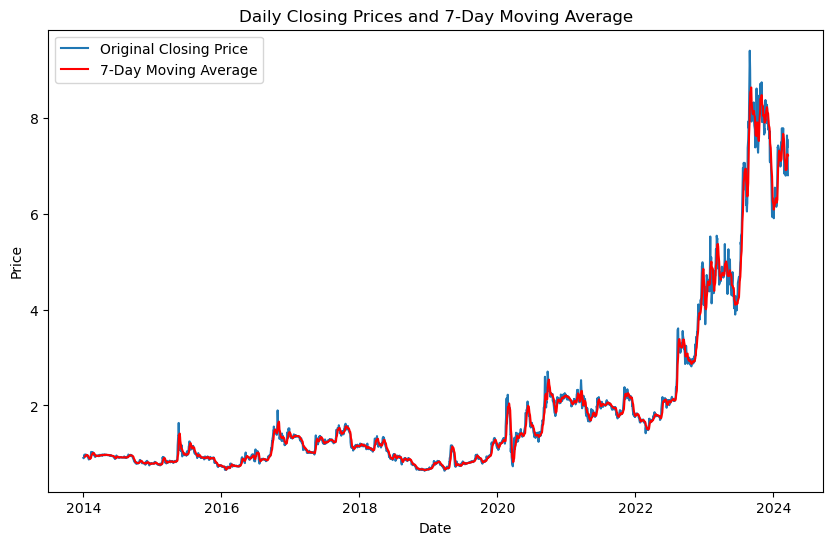

In [13]:
# Calculate the 50-day moving average on the closing prices
window_size = 7
moving_average = df['Adj Close'].rolling(window=window_size).mean()

# Plot the original closing prices and the 50-day moving average values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Adj Close'], label='Original Closing Price')
plt.plot(moving_average.index, moving_average, label='7-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Closing Prices and 7-Day Moving Average')
plt.legend()
plt.show()

### ARIMA

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

arima = ARIMA(y, order=(5,1,0))  # p=5, d=1, q=0

arima_fit = arima.fit()

arima_forecast = arima_fit.forecast(steps=30)  

r2_arima = r2_score(y[-30:], arima_forecast)
mse_arima = mean_squared_error(y[-30:], arima_forecast)
mae_arima = mean_absolute_error(y[-30:], arima_forecast)

print("R-squared:", r2_arima)
print("Mean Squared Error (MSE):", mse_arima)
print("Mean Absolute Error (MAE):", mae_arima)

C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


R-squared: -1.7736499148238454
Mean Squared Error (MSE): 0.2938346164932846
Mean Absolute Error (MAE): 0.436864590679524


C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [15]:
# ARIMA modelinin oluşturulması
arima = ARIMA(y_train, order=(5, 1, 0))  # p=5, d=1, q=0
arima_fit = arima.fit()

# Tahminlerin yapılması
arima_forecast = arima_fit.forecast(steps=len(y_test))  

# Performans metriklerinin hesaplanması
r2_arima = r2_score(y_test, arima_forecast)
mse_arima = mean_squared_error(y_test, arima_forecast)
mae_arima = mean_absolute_error(y_test, arima_forecast)

print("R-squared:", r2_arima)
print("Mean Squared Error (MSE):", mse_arima)
print("Mean Absolute Error (MAE):", mae_arima)

C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sevgi\anaconda3\Lib\site-

R-squared: -0.21086525881743245
Mean Squared Error (MSE): 3.956744987995522
Mean Absolute Error (MAE): 1.0153837660533322


### LSTM

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

features = df["Adj Close"].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

train_size = int(len(scaled_features) * 0.8)
train_data = scaled_features[:train_size]
test_data = scaled_features[train_size:]

def prepare_data(data, time_steps):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(x), np.array(y)

time_steps = 30
x_train1, y_train1 = prepare_data(train_data, time_steps)
x_test1, y_test1 = prepare_data(test_data, time_steps)

lstm = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(x_train1.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])
lstm.compile(optimizer='adam', loss='mean_squared_error')

lstm.fit(x_train1, y_train1, epochs=100, batch_size=32)




Epoch 1/100

65/65 [==============================] - 4s 13ms/step - loss: 4.4617e-04
Epoch 2/100
65/65 [==============================] - 1s 13ms/step - loss: 1.6234e-04
Epoch 3/100
65/65 [==============================] - 1s 13ms/step - loss: 1.3802e-04
Epoch 4/100
65/65 [==============================] - 1s 15ms/step - loss: 1.1503e-04
Epoch 5/100
65/65 [==============================] - 1s 14ms/step - loss: 1.0375e-04
Epoch 6/100
65/65 [==============================] - 1s 14ms/step - loss: 9.2840e-05
Epoch 7/100
65/65 [==============================] - 1s 14ms/step - loss: 8.6000e-05
Epoch 8/100
65/65 [==============================] - 1s 14ms/step - loss: 8.3801e-05
Epoch 9/100
65/65 [==============================] - 1s 15ms/step - loss: 7.9351e-05
Epoch 10/100
65/65 [==============================] - 1s 14ms/step - loss: 7.1844e-05
Epoch 11/100
65/65 [==============================] - 1s 14ms/step - loss: 6.9989e-05
Epoch 12/100
65/65 [==============================] - 1s 15

16/16 [==============================] - 1s 6ms/step
R-squared: 0.9626816199746373
MSE: 0.168225910250185
Mean Absolute Error (MAE): 0.28676600709583017


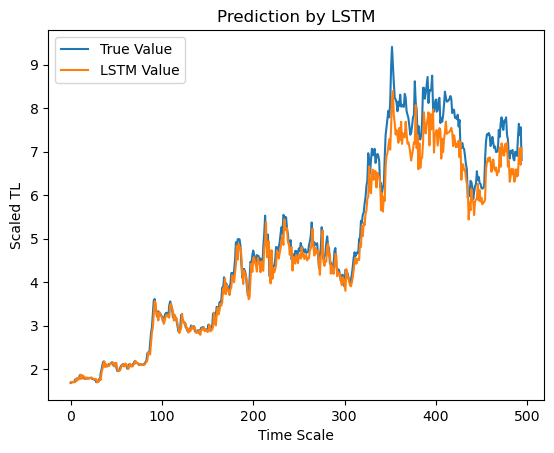

In [17]:
lstm_preds = lstm.predict(x_test1)

lstm_preds = scaler.inverse_transform(lstm_preds)
y_test1 = scaler.inverse_transform(y_test1)

r2_lstm = r2_score(y_test1, lstm_preds)
mse_lstm = mean_squared_error(y_test1, lstm_preds)
mae_lstm = mean_absolute_error(y_test1, lstm_preds)

print("R-squared:", r2_lstm)
print("MSE:", mse_lstm)
print("Mean Absolute Error (MAE):", mae_lstm)

#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test1, label='True Value')
plt.plot(lstm_preds, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled TL')
plt.legend()
plt.show()

## Regression

### OSL

In [18]:
import statsmodels.api as sm

x = sm.add_constant(x)

reg = sm.OLS(y, x)

results_reg = reg.fit()

print(results_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.731e+21
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:12:42   Log-Likelihood:                 51283.
No. Observations:                2621   AIC:                        -1.026e+05
Df Residuals:                    2615   BIC:                        -1.025e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.686e-15   2.37e-11   7.12e-05      1.0

### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
linreg = LinearRegression()

In [21]:
linreg.fit(x_train, y_train)

LinearRegression()

In [22]:
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

In [23]:
r2_lr_train = r2_score(y_train, y_train_pred)
mse_lr_train = mean_squared_error(y_train, y_train_pred)
mae_lr_train = mean_absolute_error(y_train, y_train_pred)

r2_lr_test = r2_score(y_test, y_test_pred)
mse_lr_test = mean_squared_error(y_test, y_test_pred)
mae_lr_test = mean_absolute_error(y_test, y_test_pred)


print("Training set performance:")
print("R-squared:", r2_lr_train)
print("MSE:", mse_lr_train)
print("Mean Absolute Error (MAE):", mae_lr_train)

print("\nTest set performance:")
print("R-squared:", r2_lr_test)
print("MSE:", mse_lr_test)
print("Mean Absolute Error (MAE):", mae_lr_test)

Training set performance:
R-squared: 1.0
MSE: 1.1189183814474686e-27
Mean Absolute Error (MAE): 1.72831426863045e-14

Test set performance:
R-squared: 1.0
MSE: 1.2968688979508852e-27
Mean Absolute Error (MAE): 1.6345654988266947e-14


### Ridge Regression

In [24]:
from sklearn.linear_model import Ridge

alpha = 0.1  
ridge_reg = Ridge(alpha=alpha)

ridge_reg.fit(x_train, y_train)

y_train_pred = ridge_reg.predict(x_train)
y_test_pred = ridge_reg.predict(x_test)

r2_ridge_train = r2_score(y_train, y_train_pred)
mse_ridge_train = mean_squared_error(y_train, y_train_pred)
mae_ridge_train = mean_absolute_error(y_train, y_train_pred)

r2_ridge_test = r2_score(y_test, y_test_pred)
mse_ridge_test = mean_squared_error(y_test, y_test_pred)
mae_ridge_test = mean_absolute_error(y_test, y_test_pred)


print("Training set performance:")
print("R-squared:", r2_ridge_train)
print("MSE:", mse_ridge_train)
print("Mean Absolute Error (MAE):", mae_ridge_train)

print("\nTest set performance:")
print("R-squared:", r2_ridge_test)
print("MSE:", mse_ridge_test)
print("Mean Absolute Error (MAE):", mae_ridge_test)

Training set performance:
R-squared: 0.9999994681660667
MSE: 1.621352004990835e-06
Mean Absolute Error (MAE): 0.000647279726345434

Test set performance:
R-squared: 0.9999992827225194
MSE: 2.3438479681762174e-06
Mean Absolute Error (MAE): 0.0007117098381148541


C:\Users\sevgi\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.68844e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## Ensemble Algorithms

### Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_train, y_train)

y_train_pred = rfr.predict(x_train)
y_test_pred = rfr.predict(x_test)

r2_rfr_train = r2_score(y_train, y_train_pred)
mse_rfr_train = mean_squared_error(y_train, y_train_pred)
mae_rfr_train = mean_absolute_error(y_train, y_train_pred)

r2_rfr_test = r2_score(y_test, y_test_pred)
mse_rfr_test = mean_squared_error(y_test, y_test_pred)
mae_rfr_test = mean_absolute_error(y_test, y_test_pred)

print("Training set performance:")
print("R-squared:", r2_rfr_train)
print("MSE:", mse_rfr_train)
print("Mean Absolute Error (MAE):", mae_rfr_train)

print("\nTest set performance:")
print("R-squared:", r2_rfr_test)
print("MSE:", mse_rfr_test)
print("Mean Absolute Error (MAE):", mae_rfr_test)

Training set performance:
R-squared: 0.9999841971669381
MSE: 4.8176608261991855e-05
Mean Absolute Error (MAE): 0.0015595130629773388

Test set performance:
R-squared: 0.9999466272838947
MSE: 0.00017440605006020926
Mean Absolute Error (MAE): 0.003689023504762013


### XGBoost

In [26]:
import xgboost as xgb

xgb = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 100)

xgb.fit(x_train, y_train)

y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)

r2_xgb_train = r2_score(y_train, y_train_pred)
mse_xgb_train = mean_squared_error(y_train, y_train_pred)
mae_xgb_train = mean_absolute_error(y_train, y_train_pred)

r2_xgb_test = r2_score(y_test, y_test_pred)
mse_xgb_test = mean_squared_error(y_test, y_test_pred)
mae_xgb_test = mean_absolute_error(y_test, y_test_pred)

print("Training set performance:")
print("R-squared:", r2_xgb_train)
print("MSE:", mse_xgb_train)
print("Mean Absolute Error (MAE):", mae_xgb_train)

print("\nTest set performance:")
print("R-squared:", r2_xgb_test)
print("MSE:", mse_xgb_test)
print("Mean Absolute Error (MAE):", mae_xgb_test)

Training set performance:
R-squared: 0.9959575167525048
MSE: 0.012323937806415778
Mean Absolute Error (MAE): 0.07778780656424734

Test set performance:
R-squared: 0.9968256401078659
MSE: 0.01037285734464149
Mean Absolute Error (MAE): 0.07791093199539911


# Predicting the next day's Adj Close

In [27]:
dfy = df
dfy['NextAdjClose'] = df['Adj Close'].shift(-1)
dfy

,Open,High,Low,Close,Adj Close,Volume,NextAdjClose
Date,,,,,,,
2014-01-01,0.903702,0.903702,0.903702,0.903702,0.903702,0,0.897412
2014-01-02,0.895315,0.901605,0.889024,0.897412,0.897412,1824961,0.897412
2014-01-03,0.897412,0.901605,0.891121,0.897412,0.897412,1487296,0.933056
2014-01-06,0.926766,0.935153,0.918379,0.933056,0.933056,4964666,0.972895
2014-01-07,0.960314,0.979185,0.956121,0.972895,0.972895,3834492,0.949830
...,...,...,...,...,...,...,...
2024-03-12,6.930000,7.590000,6.890000,7.320000,7.320000,92884481,7.640000
2024-03-13,7.400000,7.810000,7.300000,7.640000,7.640000,76053135,7.380000
2024-03-14,7.590000,7.660000,7.310000,7.380000,7.380000,39807552,7.560000


In [28]:
dfy.corr()

,Open,High,Low,Close,Adj Close,Volume,NextAdjClose
Open,1.000000,0.999405,0.999472,0.998842,0.998842,0.161034,0.997085
High,0.999405,1.000000,0.999186,0.999460,0.999460,0.173259,0.997763
Low,0.999472,0.999186,1.000000,0.999445,0.999445,0.155703,0.997702
Close,0.998842,0.999460,0.999445,1.000000,1.000000,0.166314,0.998429
Adj Close,0.998842,0.999460,0.999445,1.000000,1.000000,0.166314,0.998429
Volume,0.161034,0.173259,0.155703,0.166314,0.166314,1.000000,0.165004
NextAdjClose,0.997085,0.997763,0.997702,0.998429,0.998429,0.165004,1.000000


In [29]:
dfy.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
NextAdjClose    1
dtype: int64

In [30]:
dfy = dfy.dropna(axis=0)

In [31]:
dfy.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
NextAdjClose    0
dtype: int64

## Train-Test Data Split

In [32]:
y = dfy['NextAdjClose']
x_cols=[c for c in dfy.columns if c not in ['NextAdjClose']]
x = dfy[x_cols]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Regression

### OSL

In [33]:
import statsmodels.api as sm

x = sm.add_constant(x)

regn = sm.OLS(y, x)

results_regn = regn.fit()

print(results_regn.summary())

                            OLS Regression Results                            
Dep. Variable:           NextAdjClose   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.685e+05
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:12:44   Log-Likelihood:                 2372.7
No. Observations:                2620   AIC:                            -4733.
Df Residuals:                    2614   BIC:                            -4698.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047      0.003      1.550      0.1

### Linear Regression

In [34]:
linregn = LinearRegression()

linregn.fit(x_train, y_train)

y_train_pred = linregn.predict(x_train)
y_test_pred = linregn.predict(x_test)


r2_lrn_train = r2_score(y_train, y_train_pred)
mse_lrn_train = mean_squared_error(y_train, y_train_pred)
mae_lrn_train = mean_absolute_error(y_train, y_train_pred)

r2_lrn_test = r2_score(y_test, y_test_pred)
mse_lrn_test = mean_squared_error(y_test, y_test_pred)
mae_lrn_test = mean_absolute_error(y_test, y_test_pred)


print("Training set performance:")
print("R-squared:", r2_lrn_train)
print("MSE:", mse_lrn_train)
print("Mean Absolute Error (MAE):", mae_lrn_train)

print("\nTest set performance:")
print("R-squared:", r2_lrn_test)
print("MSE:", mse_lrn_test)
print("Mean Absolute Error (MAE):", mae_lrn_test)

Training set performance:
R-squared: 0.9970086740509413
MSE: 0.00946490546674684
Mean Absolute Error (MAE): 0.048913149294353794

Test set performance:
R-squared: 0.9963895492495907
MSE: 0.0101193422509413
Mean Absolute Error (MAE): 0.04985963932323317


## Ridge Regression

In [35]:
ridge_regn = Ridge(alpha=alpha)

ridge_regn.fit(x_train, y_train)

y_train_pred = ridge_regn.predict(x_train)
y_test_pred = ridge_regn.predict(x_test)

r2_ridgen_train = r2_score(y_train, y_train_pred)
mse_ridgen_train = mean_squared_error(y_train, y_train_pred)
mae_ridgen_train = mean_absolute_error(y_train, y_train_pred)

r2_ridgen_test = r2_score(y_test, y_test_pred)
mse_ridgen_test = mean_squared_error(y_test, y_test_pred)
mae_ridgen_test = mean_absolute_error(y_test, y_test_pred)


print("Training set performance:")
print("R-squared:", r2_ridgen_train)
print("MSE:", mse_ridgen_train)
print("Mean Absolute Error (MAE):", mae_ridgen_train)

print("\nTest set performance:")
print("R-squared:", r2_ridgen_test)
print("MSE:", mse_ridgen_test)
print("Mean Absolute Error (MAE):", mae_ridgen_test)

Training set performance:
R-squared: 0.9970077989710794
MSE: 0.0094676743218667
Mean Absolute Error (MAE): 0.048835411646410774

Test set performance:
R-squared: 0.9964058647458123
MSE: 0.010073613309688811
Mean Absolute Error (MAE): 0.04971353870012506


C:\Users\sevgi\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.96196e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## Time Series Models

### LSTM

In [40]:
features = dfy["NextAdjClose"].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

train_size = int(len(scaled_features) * 0.8)
train_data = scaled_features[:train_size]
test_data = scaled_features[train_size:]

def prepare_data(data, time_steps):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(x), np.array(y)

time_steps = 30
x_train1, y_train1 = prepare_data(train_data, time_steps)
x_test1, y_test1 = prepare_data(test_data, time_steps)

lstmn = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(x_train1.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])
lstmn.compile(optimizer='adam', loss='mean_squared_error')

lstmn.fit(x_train1, y_train1, epochs=100, batch_size=32)

Epoch 1/100
65/65 [==============================] - 4s 14ms/step - loss: 7.4364e-04
Epoch 2/100
65/65 [==============================] - 1s 15ms/step - loss: 1.8854e-04
Epoch 3/100
65/65 [==============================] - 1s 15ms/step - loss: 1.6428e-04
Epoch 4/100
65/65 [==============================] - 1s 15ms/step - loss: 1.4746e-04
Epoch 5/100
65/65 [==============================] - 1s 14ms/step - loss: 1.3119e-04
Epoch 6/100
65/65 [==============================] - 1s 15ms/step - loss: 1.1590e-04
Epoch 7/100
65/65 [==============================] - 1s 19ms/step - loss: 1.0252e-04
Epoch 8/100
65/65 [==============================] - 1s 18ms/step - loss: 9.8706e-05
Epoch 9/100
65/65 [==============================] - 1s 19ms/step - loss: 9.0401e-05
Epoch 10/100
65/65 [==============================] - 1s 18ms/step - loss: 9.1262e-05
Epoch 11/100
65/65 [==============================] - 1s 18ms/step - loss: 8.2424e-05
Epoch 12/100
65/65 [==============================] - 1s 18ms/s

16/16 [==============================] - 1s 7ms/step
R-squared: 0.9542210834118081
MSE: 0.20583053926267436
Mean Absolute Error (MAE): 0.330420249345015


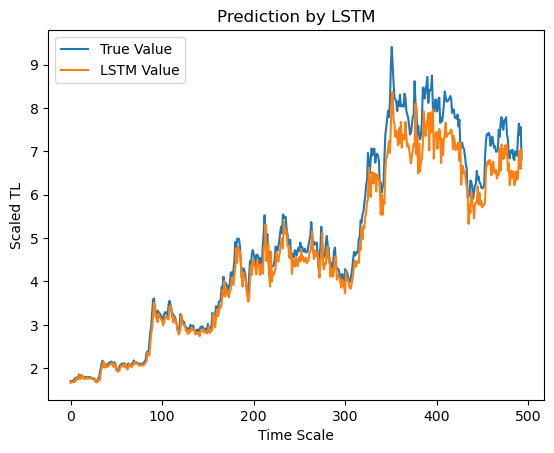

In [41]:
lstmn_preds = lstmn.predict(x_test1)

lstmn_preds = scaler.inverse_transform(lstmn_preds)
y_test1 = scaler.inverse_transform(y_test1)

r2_lstmn = r2_score(y_test1, lstmn_preds)
mse_lstmn = mean_squared_error(y_test1, lstmn_preds)
mae_lstmn = mean_absolute_error(y_test1, lstmn_preds)

print("R-squared:", r2_lstmn)
print("MSE:", mse_lstmn)
print("Mean Absolute Error (MAE):", mae_lstmn)

#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test1, label='True Value')
plt.plot(lstmn_preds, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled TL')
plt.legend()
plt.show()

### ARIMA

In [42]:
ariman = ARIMA(y_train, order=(5, 1, 0))  # p=5, d=1, q=0
ariman_fit = ariman.fit()

ariman_forecast = ariman_fit.forecast(steps=len(y_test))  

r2_ariman = r2_score(y_test, ariman_forecast)
mse_ariman = mean_squared_error(y_test, ariman_forecast)
mae_ariman = mean_absolute_error(y_test, ariman_forecast)

print("R-squared:", r2_ariman)
print("Mean Squared Error (MSE):", mse_ariman)
print("Mean Absolute Error (MAE):", mae_ariman)

C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sevgi\anaconda3\Lib\site-

R-squared: -0.21391991222580953
Mean Squared Error (MSE): 3.4023649417327833
Mean Absolute Error (MAE): 0.9382916948948321


C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Ensemble Methods

### Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

rfrn = RandomForestRegressor(n_estimators=100, random_state=42)
rfrn.fit(x_train, y_train)

y_train_pred = rfrn.predict(x_train)
y_test_pred = rfrn.predict(x_test)

r2_rfrn_train = r2_score(y_train, y_train_pred)
mse_rfrn_train = mean_squared_error(y_train, y_train_pred)
mae_rfrn_train = mean_absolute_error(y_train, y_train_pred)

r2_rfrn_test = r2_score(y_test, y_test_pred)
mse_rfrn_test = mean_squared_error(y_test, y_test_pred)
mae_rfrn_test = mean_absolute_error(y_test, y_test_pred)

print("Training set performance:")
print("R-squared:", r2_rfrn_train)
print("MSE:", mse_rfrn_train)
print("Mean Absolute Error (MAE):", mae_rfrn_train)

print("\nTest set performance:")
print("R-squared:", r2_rfrn_test)
print("MSE:", mse_rfrn_test)
print("Mean Absolute Error (MAE):", mae_rfrn_test)

Training set performance:
R-squared: 0.9994750173595444
MSE: 0.0016611065287484533
Mean Absolute Error (MAE): 0.021164301412696457

Test set performance:
R-squared: 0.9956459040615249
MSE: 0.012203624987785296
Mean Absolute Error (MAE): 0.05615253407983464


### XGBoost

In [44]:
import xgboost as xgb

xgbn = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 100)

xgbn.fit(x_train, y_train)

y_train_pred = xgbn.predict(x_train)
y_test_pred = xgbn.predict(x_test)

r2_xgbn_train = r2_score(y_train, y_train_pred)
mse_xgbn_train = mean_squared_error(y_train, y_train_pred)
mae_xgbn_train = mean_absolute_error(y_train, y_train_pred)

r2_xgbn_test = r2_score(y_test, y_test_pred)
mse_xgbn_test = mean_squared_error(y_test, y_test_pred)
mae_xgbn_test = mean_absolute_error(y_test, y_test_pred)

print("Training set performance:")
print("R-squared:", r2_xgbn_train)
print("MSE:", mse_xgbn_train)
print("Mean Absolute Error (MAE):", mae_xgbn_train)

print("\nTest set performance:")
print("R-squared:", r2_xgbn_test)
print("MSE:", mse_xgbn_test)
print("Mean Absolute Error (MAE):", mae_xgbn_test)

Training set performance:
R-squared: 0.9955431931768168
MSE: 0.014101858501329822
Mean Absolute Error (MAE): 0.07329262080941674

Test set performance:
R-squared: 0.9944880351208615
MSE: 0.015448890718381148
Mean Absolute Error (MAE): 0.07700332370740584


# Importing the Second Dataset

In [69]:
df2=pd.read_csv("./gs_matches_p.csv")
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.sort_values(by='Date', ascending=True)
df2

,LeagueName,Date,LeagueMatchNo,isHome,GF,GA,GD,PlaceInLeague,PlaceOfOp
533,Turkey Cup,2014-03-25,2,1,2,2,0,0,0
532,Turkey Cup,2014-04-16,2,0,5,2,3,0,0
531,Turkey Cup,2014-05-07,1,0,1,0,1,0,0
530,World Club Friendlies,2014-07-23,0,0,1,3,-2,0,0
529,World Club Friendlies,2014-07-27,0,0,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...
21,Turkey Super Lig,2024-12-02,14,0,2,0,2,2,16
20,Turkey Super Lig,2024-12-08,15,1,3,1,2,2,5
19,UEFA Champions League,2024-12-12,6,0,1,1,0,3,2
18,Turkey Super Lig,2024-12-20,17,1,1,1,0,2,14


In [70]:
df2.set_index('Date', inplace=True)
df2

,LeagueName,LeagueMatchNo,isHome,GF,GA,GD,PlaceInLeague,PlaceOfOp
Date,,,,,,,,
2014-03-25,Turkey Cup,2,1,2,2,0,0,0
2014-04-16,Turkey Cup,2,0,5,2,3,0,0
2014-05-07,Turkey Cup,1,0,1,0,1,0,0
2014-07-23,World Club Friendlies,0,0,1,3,-2,0,0
2014-07-27,World Club Friendlies,0,0,2,1,1,0,0
...,...,...,...,...,...,...,...,...
2024-12-02,Turkey Super Lig,14,0,2,0,2,2,16
2024-12-08,Turkey Super Lig,15,1,3,1,2,2,5
2024-12-12,UEFA Champions League,6,0,1,1,0,3,2


In [71]:
df2.head()

,LeagueName,LeagueMatchNo,isHome,GF,GA,GD,PlaceInLeague,PlaceOfOp
Date,,,,,,,,
2014-03-25,Turkey Cup,2,1,2,2,0,0,0
2014-04-16,Turkey Cup,2,0,5,2,3,0,0
2014-05-07,Turkey Cup,1,0,1,0,1,0,0
2014-07-23,World Club Friendlies,0,0,1,3,-2,0,0
2014-07-27,World Club Friendlies,0,0,2,1,1,0,0


In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 534 entries, 2014-03-25 to 2024-12-24
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LeagueName     534 non-null    object
 1   LeagueMatchNo  534 non-null    int64 
 2   isHome         534 non-null    int64 
 3   GF             534 non-null    int64 
 4   GA             534 non-null    int64 
 5   GD             534 non-null    int64 
 6   PlaceInLeague  534 non-null    int64 
 7   PlaceOfOp      534 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 37.5+ KB


In [73]:
df2.describe()

,LeagueMatchNo,isHome,GF,GA,GD,PlaceInLeague,PlaceOfOp
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,17.865169,0.503745,1.983146,1.383895,0.599251,2.370787,5.481273
std,54.887200,0.500455,1.404127,1.144611,1.692185,3.390912,6.417219
min,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000
25%,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,11.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000
75%,22.000000,1.000000,3.000000,2.000000,1.750000,3.000000,10.750000
max,636.000000,1.000000,8.000000,9.000000,7.000000,15.000000,21.000000


In [74]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_mapping_dfs = {}

# Iterate through the columns and create label mapping DataFrames

label_encoder.fit(df2['LeagueName'])
original_labels = list(label_encoder.classes_)
encoded_values = list(range(len(original_labels)))
mapping_df = pd.DataFrame({'Original Label': original_labels, 'Encoded Value': encoded_values})
label_mapping_dfs['LeagueName'] = mapping_df

# Display label mapping DataFrames for each column
for column, mapping_df in label_mapping_dfs.items():
    print(f"Label Mapping for Column: {column}")
    print(mapping_df)
    print('\n')
    
df2['LeagueName'] = label_encoder.fit_transform(df2['LeagueName'])


Label Mapping for Column: LeagueName
                     Original Label  Encoded Value
0                Club Friendly List              0
1                 Europe Friendlies              1
2                        Turkey Cup              2
3                  Turkey Super Cup              3
4                  Turkey Super Lig              4
5             UEFA Champions League              5
6  UEFA Champions League Qualifying              6
7                UEFA Europa League              7
8     UEFA Europa League Qualifying              8
9             World Club Friendlies              9




In [75]:
df2

,LeagueName,LeagueMatchNo,isHome,GF,GA,GD,PlaceInLeague,PlaceOfOp
Date,,,,,,,,
2014-03-25,2,2,1,2,2,0,0,0
2014-04-16,2,2,0,5,2,3,0,0
2014-05-07,2,1,0,1,0,1,0,0
2014-07-23,9,0,0,1,3,-2,0,0
2014-07-27,9,0,0,2,1,1,0,0
...,...,...,...,...,...,...,...,...
2024-12-02,4,14,0,2,0,2,2,16
2024-12-08,4,15,1,3,1,2,2,5
2024-12-12,5,6,0,1,1,0,3,2


In [89]:
merged_df = pd.merge(df, df2, left_index=True, right_index=True, how='left')
merged_df = merged_df.fillna(99)

In [90]:
merged_df

,Open,High,Low,Close,Adj Close,Volume,LeagueName,LeagueMatchNo,isHome,GF,GA,GD,PlaceInLeague,PlaceOfOp
Date,,,,,,,,,,,,,,
2014-01-01,0.903702,0.903702,0.903702,0.903702,0.903702,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-02,0.895315,0.901605,0.889024,0.897412,0.897412,1824961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-03,0.897412,0.901605,0.891121,0.897412,0.897412,1487296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-06,0.926766,0.935153,0.918379,0.933056,0.933056,4964666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-07,0.960314,0.979185,0.956121,0.972895,0.972895,3834492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-12,6.930000,7.590000,6.890000,7.320000,7.320000,92884481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-13,7.400000,7.810000,7.300000,7.640000,7.640000,76053135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-14,7.590000,7.660000,7.310000,7.380000,7.380000,39807552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Predicting current day's Adj Close on Merged Dataset

## Train-Test Data Split

In [92]:
merged_df = merged_df.fillna("Unknown")

y = merged_df['Adj Close']
x_cols=[c for c in merged_df.columns if c not in ['Adj Close']]
x = merged_df[x_cols]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Time Series

### LSTM for merged

In [93]:
features = merged_df["Adj Close"].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

In [94]:
train_size = int(len(scaled_features) * 0.8)
train_data = scaled_features[:train_size]
test_data = scaled_features[train_size:]

In [95]:
def prepare_data(data, time_steps):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(x), np.array(y)

time_steps = 30
x_train1, y_train1 = prepare_data(train_data, time_steps)
x_test1, y_test1 = prepare_data(test_data, time_steps)

In [96]:
lstm1 = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(x_train1.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])
lstm1.compile(optimizer='adam', loss='mean_squared_error')

In [97]:
lstm1.fit(x_train1, y_train1, epochs=100, batch_size=32)

Epoch 1/100
65/65 [==============================] - 4s 13ms/step - loss: 6.6153e-04
Epoch 2/100
65/65 [==============================] - 1s 12ms/step - loss: 1.7970e-04
Epoch 3/100
65/65 [==============================] - 1s 13ms/step - loss: 1.4483e-04
Epoch 4/100
65/65 [==============================] - 1s 13ms/step - loss: 1.3033e-04
Epoch 5/100
65/65 [==============================] - 1s 13ms/step - loss: 1.1737e-04
Epoch 6/100
65/65 [==============================] - 1s 14ms/step - loss: 1.0104e-04
Epoch 7/100
65/65 [==============================] - 1s 14ms/step - loss: 1.0392e-04
Epoch 8/100
65/65 [==============================] - 1s 14ms/step - loss: 8.8161e-05
Epoch 9/100
65/65 [==============================] - 1s 14ms/step - loss: 8.8235e-05
Epoch 10/100
65/65 [==============================] - 1s 14ms/step - loss: 8.1375e-05
Epoch 11/100
65/65 [==============================] - 1s 14ms/step - loss: 7.5370e-05
Epoch 12/100
65/65 [==============================] - 1s 14ms/s

16/16 [==============================] - 2s 7ms/step
R-squared: 0.9537412450033741
MSE: 0.20852783966128388
Mean Absolute Error (MAE): 0.33331930079097555


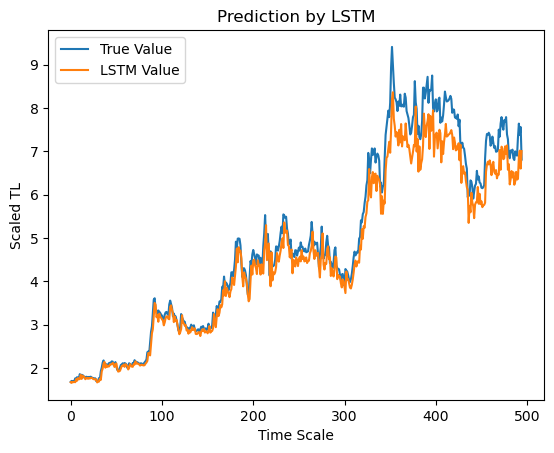

In [98]:
lstm1_preds = lstm1.predict(x_test1)

lstm1_preds = scaler.inverse_transform(lstm1_preds)
y_test1 = scaler.inverse_transform(y_test1)

r2_lstm1 = r2_score(y_test1, lstm1_preds)
mse_lstm1 = mean_squared_error(y_test1, lstm1_preds)
mae_lstm1 = mean_absolute_error(y_test1, lstm1_preds)

print("R-squared:", r2_lstm1)
print("MSE:", mse_lstm1)
print("Mean Absolute Error (MAE):", mae_lstm1)

#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test1, label='True Value')
plt.plot(lstm1_preds, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled TL')
plt.legend()
plt.show()

### ARIMA

In [99]:
arima1 = ARIMA(y_train, order=(5, 1, 0))  # p=5, d=1, q=0
arima1_fit = arima1.fit()

arima1_forecast = arima1_fit.forecast(steps=len(y_test))  

r2_arima1 = r2_score(y_test, arima1_forecast)
mse_arima1 = mean_squared_error(y_test, arima1_forecast)
mae_arima1 = mean_absolute_error(y_test, arima1_forecast)

print("R-squared:", r2_arima1)
print("Mean Squared Error (MSE):", mse_arima1)
print("Mean Absolute Error (MAE):", mae_arima1)

C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sevgi\anaconda3\Lib\site-

R-squared: -0.21086525881743245
Mean Squared Error (MSE): 3.956744987995522
Mean Absolute Error (MAE): 1.0153837660533322


C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Regression

### OSL

In [100]:
x = np.asarray(x)
y = np.asarray(y)

x = sm.add_constant(x)

reg = sm.OLS(y, x)

results_reg = reg.fit()

print(results_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.559e+18
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:02:19   Log-Likelihood:                 45023.
No. Observations:                2621   AIC:                        -9.002e+04
Df Residuals:                    2608   BIC:                        -8.994e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.529e-16   2.65e-10  -2.84e-06      1.0

### Linear Regression

In [101]:
linreg1n = LinearRegression()

linreg1n.fit(x_train, y_train)

y_train_pred = linreg1n.predict(x_train)
y_test_pred = linreg1n.predict(x_test)


r2_lr1n_train = r2_score(y_train, y_train_pred)
mse_lr1n_train = mean_squared_error(y_train, y_train_pred)
mae_lr1n_train = mean_absolute_error(y_train, y_train_pred)

r2_lr1n_test = r2_score(y_test, y_test_pred)
mse_lr1n_test = mean_squared_error(y_test, y_test_pred)
mae_lr1n_test = mean_absolute_error(y_test, y_test_pred)


print("Training set performance:")
print("R-squared:", r2_lr1n_train)
print("MSE:", mse_lr1n_train)
print("Mean Absolute Error (MAE):", mae_lr1n_train)

print("\nTest set performance:")
print("R-squared:", r2_lr1n_test)
print("MSE:", mse_lr1n_test)
print("Mean Absolute Error (MAE):", mae_lr1n_test)

Training set performance:
R-squared: 1.0
MSE: 8.532055777857562e-28
Mean Absolute Error (MAE): 1.7314976848413266e-14

Test set performance:
R-squared: 1.0
MSE: 9.841841566439067e-28
Mean Absolute Error (MAE): 1.7138671434427773e-14


### Ridge Regression

In [102]:
ridge_reg1 = Ridge(alpha=alpha)

ridge_reg1.fit(x_train, y_train)

y_train_pred = ridge_reg1.predict(x_train)
y_test_pred = ridge_reg1.predict(x_test)

r2_ridge1_train = r2_score(y_train, y_train_pred)
mse_ridge1_train = mean_squared_error(y_train, y_train_pred)
mae_ridge1_train = mean_absolute_error(y_train, y_train_pred)

r2_ridge1_test = r2_score(y_test, y_test_pred)
mse_ridge1_test = mean_squared_error(y_test, y_test_pred)
mae_ridge1_test = mean_absolute_error(y_test, y_test_pred)


print("Training set performance:")
print("R-squared:", r2_ridge1_train)
print("MSE:", mse_ridge1_train)
print("Mean Absolute Error (MAE):", mae_ridge1_train)

print("\nTest set performance:")
print("R-squared:", r2_ridge1_test)
print("MSE:", mse_ridge1_test)
print("Mean Absolute Error (MAE):", mae_ridge1_test)

Training set performance:
R-squared: 0.9999994659523894
MSE: 1.628100633974481e-06
Mean Absolute Error (MAE): 0.0006496130148602065

Test set performance:
R-squared: 0.9999992733938714
MSE: 2.374331195373873e-06
Mean Absolute Error (MAE): 0.0007154226619314743


C:\Users\sevgi\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=8.58588e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## Ensemble Methods

### Random Forest

In [103]:
rfr1 = RandomForestRegressor(n_estimators=100, random_state=42)
rfr1.fit(x_train, y_train)

y_train_pred = rfr1.predict(x_train)
y_test_pred = rfr1.predict(x_test)

r2_rfr1_train = r2_score(y_train, y_train_pred)
mse_rfr1_train = mean_squared_error(y_train, y_train_pred)
mae_rfr1_train = mean_absolute_error(y_train, y_train_pred)

r2_rfr1_test = r2_score(y_test, y_test_pred)
mse_rfr1_test = mean_squared_error(y_test, y_test_pred)
mae_rfr1_test = mean_absolute_error(y_test, y_test_pred)

print("Training set performance:")
print("R-squared:", r2_rfr1_train)
print("MSE:", mse_rfr1_train)
print("Mean Absolute Error (MAE):", mae_rfr1_train)

print("\nTest set performance:")
print("R-squared:", r2_rfr1_test)
print("MSE:", mse_rfr1_test)
print("Mean Absolute Error (MAE):", mae_rfr1_test)

Training set performance:
R-squared: 0.9999848735959899
MSE: 4.61144427429607e-05
Mean Absolute Error (MAE): 0.0015729977385497537

Test set performance:
R-squared: 0.9999454451195505
MSE: 0.00017826900905539914
Mean Absolute Error (MAE): 0.0037556873333333897


### XGBoost

In [104]:
xgb1 = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 100)

xgb1.fit(x_train, y_train)

y_train_pred = xgb1.predict(x_train)
y_test_pred = xgb1.predict(x_test)

r2_xgb1_train = r2_score(y_train, y_train_pred)
mse_xgb1_train = mean_squared_error(y_train, y_train_pred)
mae_xgb1_train = mean_absolute_error(y_train, y_train_pred)

r2_xgb1_test = r2_score(y_test, y_test_pred)
mse_xgb1_test = mean_squared_error(y_test, y_test_pred)
mae_xgb1_test = mean_absolute_error(y_test, y_test_pred)

print("Training set performance:")
print("R-squared:", r2_xgb1_train)
print("MSE:", mse_xgb1_train)
print("Mean Absolute Error (MAE):", mae_xgb1_train)

print("\nTest set performance:")
print("R-squared:", r2_xgb1_test)
print("MSE:", mse_xgb1_test)
print("Mean Absolute Error (MAE):", mae_xgb1_test)

Training set performance:
R-squared: 0.9984322937818236
MSE: 0.004779318242940766
Mean Absolute Error (MAE): 0.03413118911307095

Test set performance:
R-squared: 0.9990353664968646
MSE: 0.0031521333616515343
Mean Absolute Error (MAE): 0.03614570888144357


## Predicting next day's Adj Close on Merged Dataset

In [105]:
dfn = merged_df
dfn['NextAdjClose'] = merged_df['Adj Close'].shift(-1)
dfn

,Open,High,Low,Close,Adj Close,Volume,LeagueName,LeagueMatchNo,isHome,GF,GA,GD,PlaceInLeague,PlaceOfOp,NextAdjClose
Date,,,,,,,,,,,,,,,
2014-01-01,0.903702,0.903702,0.903702,0.903702,0.903702,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.897412
2014-01-02,0.895315,0.901605,0.889024,0.897412,0.897412,1824961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.897412
2014-01-03,0.897412,0.901605,0.891121,0.897412,0.897412,1487296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.933056
2014-01-06,0.926766,0.935153,0.918379,0.933056,0.933056,4964666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.972895
2014-01-07,0.960314,0.979185,0.956121,0.972895,0.972895,3834492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-12,6.930000,7.590000,6.890000,7.320000,7.320000,92884481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.640000
2024-03-13,7.400000,7.810000,7.300000,7.640000,7.640000,76053135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.380000
2024-03-14,7.590000,7.660000,7.310000,7.380000,7.380000,39807552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.560000


In [106]:
dfn.corr()

,Open,High,Low,Close,Adj Close,Volume,LeagueName,LeagueMatchNo,isHome,GF,GA,GD,PlaceInLeague,PlaceOfOp,NextAdjClose
Open,1.000000,0.999405,0.999472,0.998842,0.998842,0.161034,-0.028771,0.090691,-0.002291,-0.012014,-0.026236,0.010341,-0.009837,0.036272,0.997085
High,0.999405,1.000000,0.999186,0.999460,0.999460,0.173259,-0.029381,0.089805,-0.002832,-0.012863,-0.026728,0.009717,-0.009747,0.036176,0.997763
Low,0.999472,0.999186,1.000000,0.999445,0.999445,0.155703,-0.027456,0.092963,-0.000959,-0.010781,-0.024972,0.010701,-0.009097,0.037310,0.997702
Close,0.998842,0.999460,0.999445,1.000000,1.000000,0.166314,-0.027682,0.092563,-0.000877,-0.011120,-0.025305,0.010587,-0.008861,0.037596,0.998429
Adj Close,0.998842,0.999460,0.999445,1.000000,1.000000,0.166314,-0.027682,0.092563,-0.000877,-0.011120,-0.025305,0.010587,-0.008861,0.037596,0.998429
Volume,0.161034,0.173259,0.155703,0.166314,0.166314,1.000000,-0.040669,-0.002530,-0.014679,-0.028581,-0.018096,-0.019489,-0.013042,-0.003298,0.165004
LeagueName,-0.028771,-0.029381,-0.027456,-0.027682,-0.027682,-0.040669,1.000000,0.288710,0.627542,0.631455,0.665851,0.165918,0.439583,0.480373,-0.031194
LeagueMatchNo,0.090691,0.089805,0.092963,0.092563,0.092563,-0.002530,0.288710,1.000000,0.168952,0.201567,0.248482,0.017214,0.114887,0.150249,0.087164
isHome,-0.002291,-0.002832,-0.000959,-0.000877,-0.000877,-0.014679,0.627542,0.168952,1.000000,0.626524,0.508088,0.316394,0.320942,0.405087,-0.004255
GF,-0.012014,-0.012863,-0.010781,-0.011120,-0.011120,-0.028581,0.631455,0.201567,0.626524,1.000000,0.655328,0.659825,0.365961,0.493725,-0.013369


In [111]:
dfn.isnull().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
LeagueName       0
LeagueMatchNo    0
isHome           0
GF               0
GA               0
GD               0
PlaceInLeague    0
PlaceOfOp        0
NextAdjClose     1
dtype: int64

In [112]:
dfn = dfn.dropna(axis=0)

dfn.isnull().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
LeagueName       0
LeagueMatchNo    0
isHome           0
GF               0
GA               0
GD               0
PlaceInLeague    0
PlaceOfOp        0
NextAdjClose     0
dtype: int64

## Train-Test Data Split

In [113]:
y = dfn['NextAdjClose']
x_cols=[c for c in dfn.columns if c not in ['NextAdjClose']]
x = dfn[x_cols]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Time Series

### LSTM

In [117]:
features = dfn["NextAdjClose"].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

train_size = int(len(scaled_features) * 0.8)
train_data = scaled_features[:train_size]
test_data = scaled_features[train_size:]

def prepare_data(data, time_steps):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(x), np.array(y)

time_steps = 30
x_train1, y_train1 = prepare_data(train_data, time_steps)
x_test1, y_test1 = prepare_data(test_data, time_steps)

lstm1n = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(x_train1.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])
lstm1n.compile(optimizer='adam', loss='mean_squared_error')

lstm1n.fit(x_train1, y_train1, epochs=100, batch_size=32)

Epoch 1/100
65/65 [==============================] - 7s 20ms/step - loss: 6.8599e-04
Epoch 2/100
65/65 [==============================] - 1s 23ms/step - loss: 1.8557e-04
Epoch 3/100
65/65 [==============================] - 1s 22ms/step - loss: 1.6469e-04
Epoch 4/100
65/65 [==============================] - 1s 19ms/step - loss: 1.4377e-04
Epoch 5/100
65/65 [==============================] - 1s 21ms/step - loss: 1.3342e-04
Epoch 6/100
65/65 [==============================] - 1s 20ms/step - loss: 1.1315e-04
Epoch 7/100
65/65 [==============================] - 1s 18ms/step - loss: 1.0709e-04
Epoch 8/100
65/65 [==============================] - 1s 22ms/step - loss: 9.7604e-05
Epoch 9/100
65/65 [==============================] - 1s 20ms/step - loss: 8.9893e-05
Epoch 10/100
65/65 [==============================] - 1s 19ms/step - loss: 9.3741e-05
Epoch 11/100
65/65 [==============================] - 1s 19ms/step - loss: 9.0769e-05
Epoch 12/100
65/65 [==============================] - 1s 17ms/s

16/16 [==============================] - 1s 9ms/step
R-squared: 0.958749301288838
MSE: 0.18547082791536917
Mean Absolute Error (MAE): 0.3115672319949069


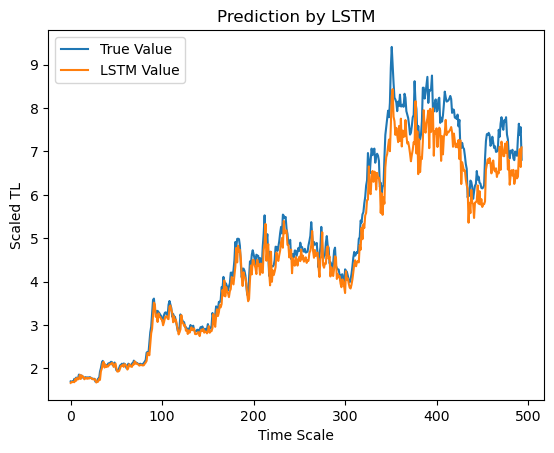

In [118]:
lstm1n_preds = lstm1n.predict(x_test1)

lstm1n_preds = scaler.inverse_transform(lstm1n_preds)
y_test1 = scaler.inverse_transform(y_test1)

r2_lstm1n = r2_score(y_test1, lstm1n_preds)
mse_lstm1n = mean_squared_error(y_test1, lstm1n_preds)
mae_lstm1n = mean_absolute_error(y_test1, lstm1n_preds)

print("R-squared:", r2_lstm1n)
print("MSE:", mse_lstm1n)
print("Mean Absolute Error (MAE):", mae_lstm1n)

#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test1, label='True Value')
plt.plot(lstm1n_preds, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled TL')
plt.legend()
plt.show()

### ARIMA

In [119]:
arima1n = ARIMA(y_train, order=(5, 1, 0))  # p=5, d=1, q=0
arima1n_fit = arima1.fit()

arima1n_forecast = arima1n_fit.forecast(steps=len(y_test))  

r2_arima1n = r2_score(y_test, arima1n_forecast)
mse_arima1n = mean_squared_error(y_test, arima1n_forecast)
mae_arima1n = mean_absolute_error(y_test, arima1n_forecast)

print("R-squared:", r2_arima1n)
print("Mean Squared Error (MSE):", mse_arima1n)
print("Mean Absolute Error (MAE):", mae_arima1n)

C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sevgi\anaconda3\Lib\site-

R-squared: -0.20917808566226959
Mean Squared Error (MSE): 3.3890745884754714
Mean Absolute Error (MAE): 0.9369511540983023


C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sevgi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Regression

### Linear Regression

In [120]:
linreg1n = LinearRegression()

linreg1n.fit(x_train, y_train)

y_train_pred = linreg1n.predict(x_train)
y_test_pred = linreg1n.predict(x_test)


r2_lr1n_train = r2_score(y_train, y_train_pred)
mse_lr1n_train = mean_squared_error(y_train, y_train_pred)
mae_lr1n_train = mean_absolute_error(y_train, y_train_pred)

r2_lr1n_test = r2_score(y_test, y_test_pred)
mse_lr1n_test = mean_squared_error(y_test, y_test_pred)
mae_lr1n_test = mean_absolute_error(y_test, y_test_pred)


print("Training set performance:")
print("R-squared:", r2_lr1n_train)
print("MSE:", mse_lr1n_train)
print("Mean Absolute Error (MAE):", mae_lr1n_train)

print("\nTest set performance:")
print("R-squared:", r2_lr1n_test)
print("MSE:", mse_lr1n_test)
print("Mean Absolute Error (MAE):", mae_lr1n_test)

Training set performance:
R-squared: 0.9970745515351075
MSE: 0.009256461395242173
Mean Absolute Error (MAE): 0.04879408155548967

Test set performance:
R-squared: 0.9964019640928614
MSE: 0.010084546028327078
Mean Absolute Error (MAE): 0.0505862338416311


### Ridge Regression

In [121]:
ridge_reg1n = Ridge(alpha=alpha)

ridge_reg1n.fit(x_train, y_train)

y_train_pred = ridge_reg1n.predict(x_train)
y_test_pred = ridge_reg1n.predict(x_test)

r2_ridge1n_train = r2_score(y_train, y_train_pred)
mse_ridge1n_train = mean_squared_error(y_train, y_train_pred)
mae_ridge1n_train = mean_absolute_error(y_train, y_train_pred)

r2_ridge1n_test = r2_score(y_test, y_test_pred)
mse_ridge1n_test = mean_squared_error(y_test, y_test_pred)
mae_ridge1n_test = mean_absolute_error(y_test, y_test_pred)


print("Training set performance:")
print("R-squared:", r2_ridge1n_train)
print("MSE:", mse_ridge1n_train)
print("Mean Absolute Error (MAE):", mae_ridge1n_train)

print("\nTest set performance:")
print("R-squared:", r2_ridge1n_test)
print("MSE:", mse_ridge1n_test)
print("Mean Absolute Error (MAE):", mae_ridge1n_test)

Training set performance:
R-squared: 0.99707365556463
MSE: 0.009259296350714702
Mean Absolute Error (MAE): 0.04871209719532422

Test set performance:
R-squared: 0.9964177544007428
MSE: 0.010040289080719893
Mean Absolute Error (MAE): 0.05044859106847926


C:\Users\sevgi\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.59268e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## Ensemble Methods

### Random Forest

In [122]:
rfr1n = RandomForestRegressor(n_estimators=100, random_state=42)
rfr1n.fit(x_train, y_train)

y_train_pred = rfr1n.predict(x_train)
y_test_pred = rfr1n.predict(x_test)

r2_rfr1n_train = r2_score(y_train, y_train_pred)
mse_rfr1n_train = mean_squared_error(y_train, y_train_pred)
mae_rfr1n_train = mean_absolute_error(y_train, y_train_pred)

r2_rfr1n_test = r2_score(y_test, y_test_pred)
mse_rfr1n_test = mean_squared_error(y_test, y_test_pred)
mae_rfr1n_test = mean_absolute_error(y_test, y_test_pred)

print("Training set performance:")
print("R-squared:", r2_rfr1n_train)
print("MSE:", mse_rfr1n_train)
print("Mean Absolute Error (MAE):", mae_rfr1n_train)

print("\nTest set performance:")
print("R-squared:", r2_rfr1n_test)
print("MSE:", mse_rfr1n_test)
print("Mean Absolute Error (MAE):", mae_rfr1n_test)

Training set performance:
R-squared: 0.9994792427897543
MSE: 0.0016477367729362332
Mean Absolute Error (MAE): 0.021130279011518448

Test set performance:
R-squared: 0.9957032221230779
MSE: 0.01204297438703956
Mean Absolute Error (MAE): 0.056167573390812485


### XGBoost

In [123]:
xgb1n = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 100)

xgb1n.fit(x_train, y_train)

y_train_pred = xgb1n.predict(x_train)
y_test_pred = xgb1n.predict(x_test)

r2_xgb1n_train = r2_score(y_train, y_train_pred)
mse_xgb1n_train = mean_squared_error(y_train, y_train_pred)
mae_xgb1n_train = mean_absolute_error(y_train, y_train_pred)

r2_xgb1n_test = r2_score(y_test, y_test_pred)
mse_xgb1n_test = mean_squared_error(y_test, y_test_pred)
mae_xgb1n_test = mean_absolute_error(y_test, y_test_pred)

print("Training set performance:")
print("R-squared:", r2_xgb1n_train)
print("MSE:", mse_xgb1n_train)
print("Mean Absolute Error (MAE):", mae_xgb1n_train)

print("\nTest set performance:")
print("R-squared:", r2_xgb1n_test)
print("MSE:", mse_xgb1n_test)
print("Mean Absolute Error (MAE):", mae_xgb1n_test)

Training set performance:
R-squared: 0.9964578775436703
MSE: 0.011207690091864429
Mean Absolute Error (MAE): 0.0614030827825943

Test set performance:
R-squared: 0.9953227578417189
MSE: 0.013109336607018223
Mean Absolute Error (MAE): 0.06737303649798969
